<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev3/S10/EVA4_S10_Solution_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session10 : CIFAR 10

**Target**: 


*   Make sure  to Add CutOut to your code. It should come from your transformations (albumentations)
*   Use this repo: https://github.com/davidtvs/pytorch-lr-finder (Links to an external site.) 
  *  Move LR Finder code to your modules
  *  Implement LR Finder (for SGD, not for ADAM)
  *  Implement ReduceLROnPlatea: https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.ReduceLROnPlateau (Links to an external site.)
*   Find best LR to train your model
*   Use SDG with Momentum
*   Train for 50 Epochs. 
*   Show Training and Test Accuracy curves
*   Target Accuracy is 88%
*   Run GradCAM on the any 25 misclassified images. Make sure you mention what is the prediction and what was the ground truth label.
*   Submit answers to S10-Assignment-Solution. 

**Results**

*  Total Parameters = 
*  After 10 Epochs, Final Train Accuracy = 
*  After 10 Epochs, Final Test Accuracy =

**Analysis**

*  Target accuracy > 88% using Reset18 architecture. Model performance is good as train and test accuracy is small.

## 1. Loading Module and Models 

In [1]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!rm -rf EVA4
!git clone -b rev3 https://github.com/sujitojha1/EVA4 -q --quiet
print("Loaded EVA4 Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet
#pip install apex -q

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA4 Modules and Models
     |████████████████████████████████| 634kB 7.0MB/s 



## 2. Loading train and test data with transforms and loader functions

In [2]:
from EVA4.Modules import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

  pip install torch-lr-finder -v --global-option="amp"


CUDA availability ? True


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [3]:
cifar10.data_summary_stats()
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

Files already downloaded and verified


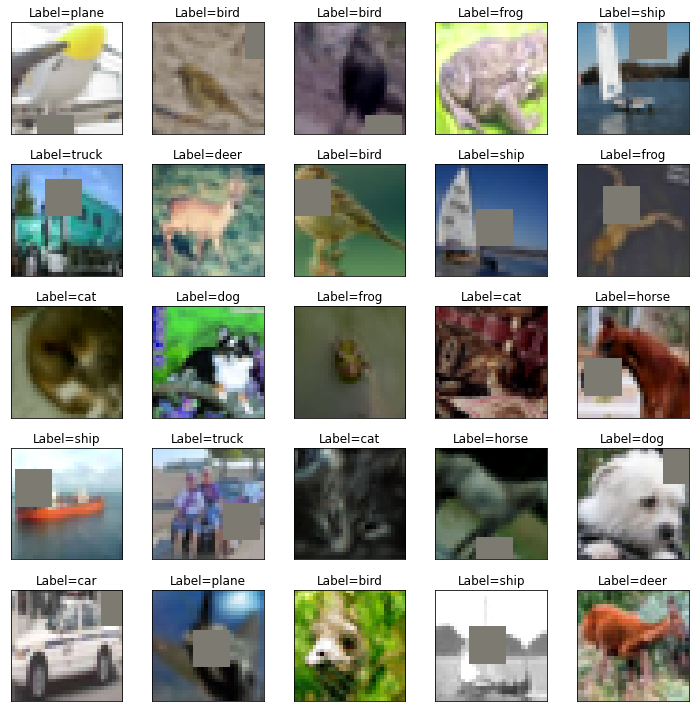

In [4]:
cifar10.sample_pictures(train_flag=True)

# The Model

In [5]:
from EVA4.Models import *

# Loading ResNet18 Model
net = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [6]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Define a Loss function and optimizer

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



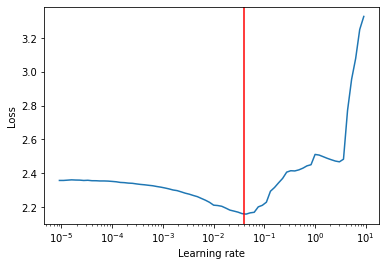

In [15]:
from EVA4.Modules import LRFinder
import torch.optim as optim

model = net
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-6, weight_decay=1e-2,momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot(show_lr=0.040) # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial stat

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.040, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.5, patience=5, verbose=True)

# Training and Testing

In [18]:
# Load train and test model
from EVA4.Modules import *

train = train()
test = test()

for epoch in range(50):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    test.execute(net, device, testloader, criterion)
    scheduler.step(train.train_losses[-1])

print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 0


Loss=1.6621277332305908 Batch_id=390 Accuracy=39.00: 100%|██████████| 391/391 [00:33<00:00, 11.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0114, Accuracy: 4936/10000 (49.36%)


Epoch: 1


Loss=1.0384705066680908 Batch_id=390 Accuracy=53.67: 100%|██████████| 391/391 [00:33<00:00, 11.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 5751/10000 (57.51%)


Epoch: 2


Loss=1.281605839729309 Batch_id=390 Accuracy=61.61: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6860/10000 (68.60%)


Epoch: 3


Loss=1.167741060256958 Batch_id=390 Accuracy=67.07: 100%|██████████| 391/391 [00:32<00:00, 11.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7228/10000 (72.28%)


Epoch: 4


Loss=0.8679288029670715 Batch_id=390 Accuracy=70.96: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7815/10000 (78.15%)


Epoch: 5


Loss=0.7547536492347717 Batch_id=390 Accuracy=73.41: 100%|██████████| 391/391 [00:32<00:00, 12.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8061/10000 (80.61%)


Epoch: 6


Loss=0.9836106300354004 Batch_id=390 Accuracy=75.53: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 7996/10000 (79.96%)


Epoch: 7


Loss=0.8097867965698242 Batch_id=390 Accuracy=77.39: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8136/10000 (81.36%)


Epoch: 8


Loss=0.4938642084598541 Batch_id=390 Accuracy=78.71: 100%|██████████| 391/391 [00:32<00:00, 12.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8297/10000 (82.97%)


Epoch: 9


Loss=0.5942590832710266 Batch_id=390 Accuracy=80.03: 100%|██████████| 391/391 [00:32<00:00, 12.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8257/10000 (82.57%)


Epoch: 10


Loss=0.5519577860832214 Batch_id=390 Accuracy=80.96: 100%|██████████| 391/391 [00:32<00:00, 12.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8571/10000 (85.71%)


Epoch: 11


Loss=0.46664324402809143 Batch_id=390 Accuracy=82.08: 100%|██████████| 391/391 [00:31<00:00, 12.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8479/10000 (84.79%)


Epoch: 12


Loss=0.34581416845321655 Batch_id=390 Accuracy=82.97: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8613/10000 (86.13%)


Epoch: 13


Loss=0.4832936227321625 Batch_id=390 Accuracy=83.68: 100%|██████████| 391/391 [00:32<00:00, 11.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8666/10000 (86.66%)


Epoch: 14


Loss=0.3999885022640228 Batch_id=390 Accuracy=84.56: 100%|██████████| 391/391 [00:32<00:00, 11.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8641/10000 (86.41%)


Epoch: 15


Loss=0.6298307180404663 Batch_id=390 Accuracy=84.91: 100%|██████████| 391/391 [00:32<00:00, 11.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8736/10000 (87.36%)


Epoch: 16


Loss=0.4903758466243744 Batch_id=390 Accuracy=85.67: 100%|██████████| 391/391 [00:32<00:00, 11.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8781/10000 (87.81%)


Epoch: 17


Loss=0.34969621896743774 Batch_id=390 Accuracy=86.24: 100%|██████████| 391/391 [00:33<00:00, 11.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8694/10000 (86.94%)


Epoch: 18


Loss=0.3161507248878479 Batch_id=390 Accuracy=86.63: 100%|██████████| 391/391 [00:36<00:00, 10.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8869/10000 (88.69%)


Epoch: 19


Loss=0.3447860777378082 Batch_id=390 Accuracy=87.01: 100%|██████████| 391/391 [00:32<00:00, 11.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8889/10000 (88.89%)


Epoch: 20


Loss=0.36998647451400757 Batch_id=390 Accuracy=87.70: 100%|██████████| 391/391 [00:32<00:00, 11.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8967/10000 (89.67%)


Epoch: 21


Loss=0.3418814241886139 Batch_id=390 Accuracy=87.91: 100%|██████████| 391/391 [00:32<00:00, 11.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8939/10000 (89.39%)


Epoch: 22


Loss=0.46623507142066956 Batch_id=390 Accuracy=88.41: 100%|██████████| 391/391 [00:32<00:00, 11.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8951/10000 (89.51%)


Epoch: 23


Loss=0.34929633140563965 Batch_id=390 Accuracy=88.73: 100%|██████████| 391/391 [00:33<00:00, 11.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8945/10000 (89.45%)


Epoch: 24


Loss=0.46021953225135803 Batch_id=390 Accuracy=89.07: 100%|██████████| 391/391 [00:33<00:00, 11.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9000/10000 (90.00%)

Epoch    25: reducing learning rate of group 0 to 2.0000e-02.

Epoch: 25


Loss=0.35239726305007935 Batch_id=390 Accuracy=91.15: 100%|██████████| 391/391 [00:33<00:00, 11.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9109/10000 (91.09%)


Epoch: 26


Loss=0.29166290163993835 Batch_id=390 Accuracy=91.45: 100%|██████████| 391/391 [00:32<00:00, 11.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9122/10000 (91.22%)


Epoch: 27


Loss=0.36325177550315857 Batch_id=390 Accuracy=91.89: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9102/10000 (91.02%)


Epoch: 28


Loss=0.22649255394935608 Batch_id=390 Accuracy=92.09: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9078/10000 (90.78%)


Epoch: 29


Loss=0.32490062713623047 Batch_id=390 Accuracy=92.35: 100%|██████████| 391/391 [00:32<00:00, 11.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9138/10000 (91.38%)


Epoch: 30


Loss=0.2847110629081726 Batch_id=390 Accuracy=92.41: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9140/10000 (91.40%)


Epoch: 31


Loss=0.26691755652427673 Batch_id=390 Accuracy=92.46: 100%|██████████| 391/391 [00:33<00:00, 11.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9182/10000 (91.82%)


Epoch: 32


Loss=0.26422998309135437 Batch_id=390 Accuracy=92.58: 100%|██████████| 391/391 [00:33<00:00, 11.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9157/10000 (91.57%)


Epoch: 33


Loss=0.29614976048469543 Batch_id=390 Accuracy=92.62: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9164/10000 (91.64%)


Epoch: 34


Loss=0.11448299884796143 Batch_id=390 Accuracy=92.89: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9186/10000 (91.86%)


Epoch: 35


Loss=0.2019502818584442 Batch_id=390 Accuracy=93.17: 100%|██████████| 391/391 [00:33<00:00, 11.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9168/10000 (91.68%)


Epoch: 36


Loss=0.21697154641151428 Batch_id=390 Accuracy=93.10: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9162/10000 (91.62%)


Epoch: 37


Loss=0.3198418915271759 Batch_id=390 Accuracy=93.41: 100%|██████████| 391/391 [00:32<00:00, 11.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9190/10000 (91.90%)


Epoch: 38


Loss=0.3373413681983948 Batch_id=390 Accuracy=93.35: 100%|██████████| 391/391 [00:33<00:00, 11.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9206/10000 (92.06%)


Epoch: 39


Loss=0.16080424189567566 Batch_id=390 Accuracy=93.54: 100%|██████████| 391/391 [00:32<00:00, 11.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9172/10000 (91.72%)


Epoch: 40


Loss=0.15886899828910828 Batch_id=390 Accuracy=93.73: 100%|██████████| 391/391 [00:33<00:00, 11.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9165/10000 (91.65%)

Epoch    41: reducing learning rate of group 0 to 1.0000e-02.

Epoch: 41


Loss=0.09195435047149658 Batch_id=390 Accuracy=94.29: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9239/10000 (92.39%)


Epoch: 42


Loss=0.22986677289009094 Batch_id=390 Accuracy=94.61: 100%|██████████| 391/391 [00:32<00:00, 11.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9272/10000 (92.72%)


Epoch: 43


Loss=0.3676864504814148 Batch_id=390 Accuracy=94.90: 100%|██████████| 391/391 [00:32<00:00, 11.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9245/10000 (92.45%)


Epoch: 44


Loss=0.12926769256591797 Batch_id=390 Accuracy=94.79: 100%|██████████| 391/391 [00:32<00:00, 11.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9265/10000 (92.65%)


Epoch: 45


Loss=0.21020790934562683 Batch_id=390 Accuracy=95.13: 100%|██████████| 391/391 [00:32<00:00, 11.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9282/10000 (92.82%)


Epoch: 46


Loss=0.11149124801158905 Batch_id=390 Accuracy=95.10: 100%|██████████| 391/391 [00:33<00:00, 11.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9261/10000 (92.61%)


Epoch: 47


Loss=0.09227481484413147 Batch_id=390 Accuracy=95.00: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9284/10000 (92.84%)

Epoch    48: reducing learning rate of group 0 to 5.0000e-03.

Epoch: 48


Loss=0.2159034013748169 Batch_id=390 Accuracy=95.47: 100%|██████████| 391/391 [00:33<00:00, 11.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9300/10000 (93.00%)


Epoch: 49


Loss=0.1400449126958847 Batch_id=390 Accuracy=95.41: 100%|██████████| 391/391 [00:33<00:00, 11.72it/s]



Test set: Average loss: 0.0020, Accuracy: 9281/10000 (92.81%)

Finished Training


# Misclassified images


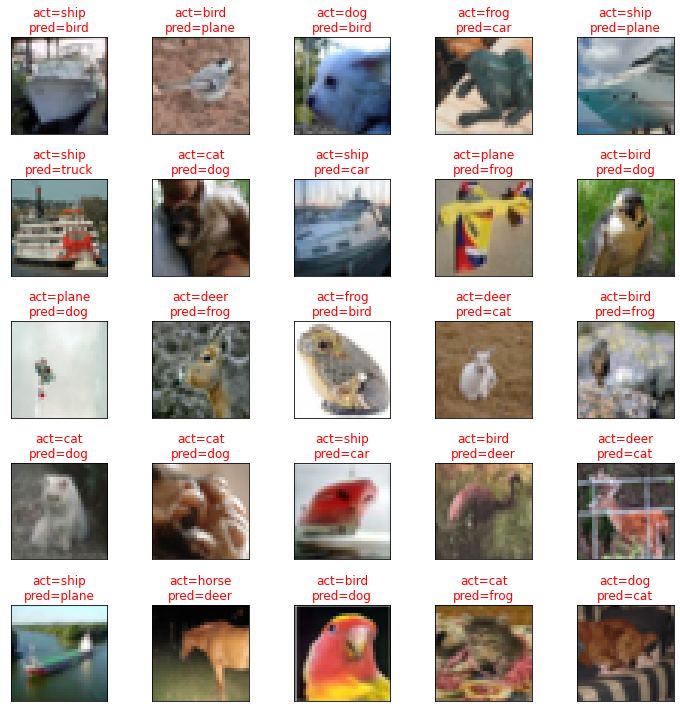

In [19]:
plot_misclassified_images(net,device,testloader,classes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


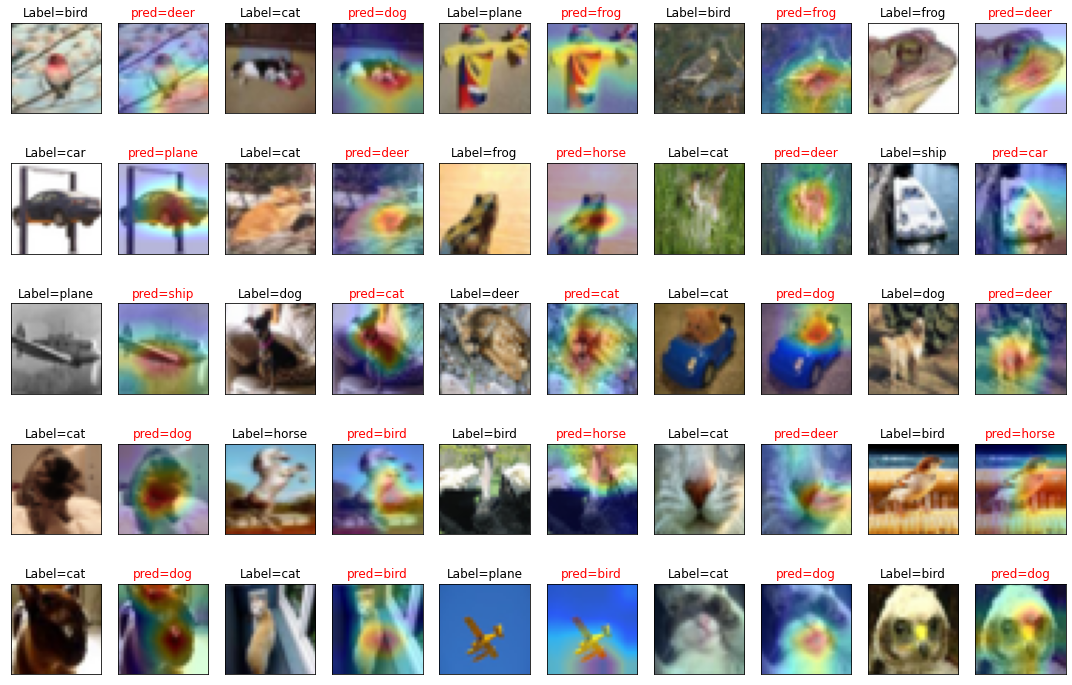

In [20]:
plot_misclassified_images_w_gradcam(net,device,testloader,classes)

# Plotting Train & Test Accuracy/Losses

# Evaluating test Accuracy over different classes 

In [21]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 91 %
Accuracy of   car : 97 %
Accuracy of  bird : 94 %
Accuracy of   cat : 91 %
Accuracy of  deer : 100 %
Accuracy of   dog : 80 %
Accuracy of  frog : 100 %
Accuracy of horse : 100 %
Accuracy of  ship : 96 %
Accuracy of truck : 100 %


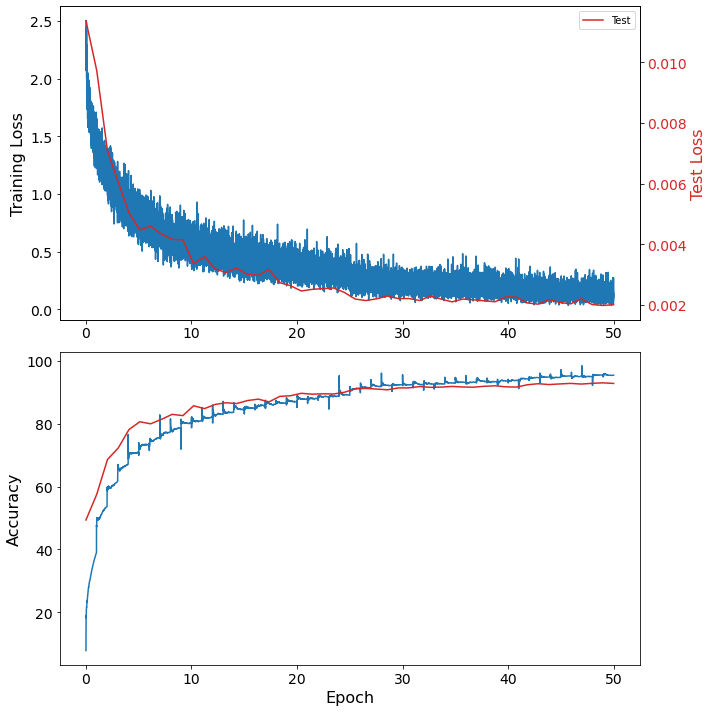

In [22]:
plot_train_test_acc_loss(train,test)